# Homework 1

In [1]:
# we will always use the imports below for convenience
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline

## Problem 2

## a).

Note that `Sigma` needs to be symmetric to be a valid covariance matrix. In this case, it is better to use `np.linalg.eigh` instead of `np.linalg.eig` as it ensures that the obtained eigenvalues are real.

In [2]:
def G_sample(mu, Sigma, n=10000):
    D, V = np.linalg.eigh(Sigma)  # Decompose covariance matrix
    mu = np.array(mu)
    
    if not len(mu)==len(D):  # Ensure that arguments agree on value of d
        raise ValueError('The dimension of the arguments must agree!')
    
    return (V * np.sqrt(D).reshape(1, -1)).dot(np.random.randn(len(D), n)) + mu.reshape(-1, 1)

**A quick note on the formula we used above, as it is not obvious how it works**:

We compute the whole array of random numbers in one go. As specified by the question, we will compute a $d \times n$ array of random normals, where each column is one sample from a multivariate normal. We are given in the notes that we should compute
$V \sqrt{D} g + \mu$ for each sample. Now, note that if we write $G$ a $d \times n$ matrix, then we can consider $V \sqrt{D} G$,
and each column of that matrix will be of the form $V \sqrt{D} G_i$, where $G_i$ is the $i$th column of $G$.

To add $\mu$ to each column of $G$, we use the technique of [broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html). It is the method used by numpy to perform operations between arrays of different dimensions. In this case, we have that $V \sqrt{D} G$ is a $d \times n$ array, and $\mu$ is an array of length $d$. We
reshape $d$ into an array of size $d \times 1$. Now, as the second dimension of $\mu$ has length 1, numpy will operate
as if it is constant along that dimension, adding $\mu$ to each column.

A similar trick is used to compute $V\sqrt{D}$ without having to create a $d \times d$ matrix $D$. Indeed, note that
if $D$ is diagonal, $V\sqrt{D}$ simply multiplies each column of $V$ by the square root of theappropriate entry in $D$.
We simply reshape $D$ so that it broadcasts correctly to multiply the columns.

**Additional note on numericallinear algebra**

Although this is a mathematically straightforward way to generate multivariate normals, eigenvalue decompositions have a tendency to be somewhat numerically unstable (especially for large matrices). In practice, we prefer to use a [cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) to compute the matrix square root.

In [3]:
Sigma = np.array([[4,2,1],[2,3,1.5],[1,1.5,2]])
mu = np.array([1,2,3])

## b).

Below we display the largest errors between the true and emprirical mean vectors and covariance matrices. Note that they are very small (i.e., our method for sampling from a $\mathcal{N}(\mu, \Sigma)$ distribution is working).

In [4]:
G = G_sample(mu, Sigma)
print(f"Computed covariance:\n {np.cov(G)}\n Computed mean: \n {np.mean(G, 1)}")
print("Covariance matrices difference: {}".format(np.max(np.abs(Sigma - np.cov(G)))))
print("Mean vectors difference: {}".format(np.max(np.abs((np.mean(G,1) - mu)))))

Computed covariance:
 [[ 4.01468739  2.01698194  1.03896286]
 [ 2.01698194  3.01253726  1.53023716]
 [ 1.03896286  1.53023716  2.04904487]]
 Computed mean: 
 [ 1.00412141  2.02104057  3.00371709]
Covariance matrices difference: 0.049044867843763384
Mean vectors difference: 0.02104056924275044


## c).

We will not plot 2d and 3d samples generated by our function. Note that the ellipsoidal shape of the distribution is determined by the covariance matrix.

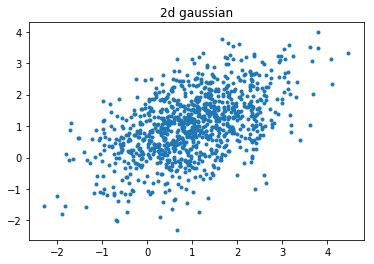

In [5]:
mu = np.ones(2)
Sigma = np.array([[1, .5], [.5, 1]])
G = G_sample(mu, Sigma, n=1000)
plt.scatter(x=G[0,:], y=G[1,:], marker='.')
plt.title('2d gaussian')
plt.show()

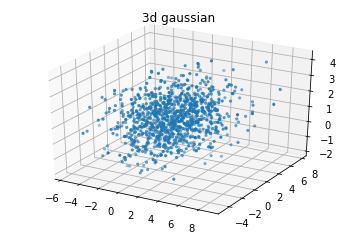

In [6]:
mu = np.ones(3)
Sigma = np.array([[5, 2, 1], [2, 3, 1], [0, 1, 1]])
G = G_sample(mu, Sigma, n=1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=G[0,:], ys=G[1,:], zs=G[2,:], marker='.')
plt.title('3d gaussian')
plt.show()

## Problem 3

Histograms are a typical example of a non-parametric estimator, and must thus balance bias and variance. We see in the first plots that with only 100 points, the histograms are quite different from each other: as the sample size is small, this is somewhat expected.

In the second set of plots, we have drastically increased our sample size, and all four realizations of the histogram look similar.

In the third set of plots, we have th esame sample size, but are instead looking at another aspect, the bias of our estimate. Indeed, if we think of the histogram as some estimate of the density, we see that with very few bins, the histogram looks quite different from the normal density. However, we see that as we increase the number of bins too much, the variability returns.

The fourth plot is an extreme example of this phenomenon, where we have selected way more bins than even data points, so that
most data points will only have a single bin.

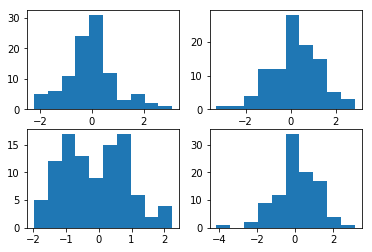

In [7]:
plt.subplot(221)
plt.hist(np.random.randn(100), bins=10)
plt.subplot(222)
plt.hist(np.random.randn(100), bins=10)
plt.subplot(223)
plt.hist(np.random.randn(100), bins=10)
plt.subplot(224)
_=plt.hist(np.random.randn(100), bins=10)

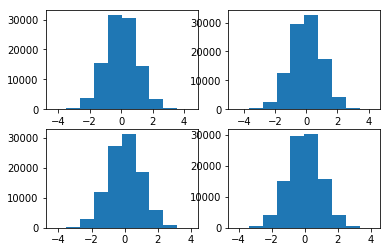

In [8]:
plt.subplot(221)
plt.hist(np.random.randn(100000), bins=10)
plt.subplot(222)
plt.hist(np.random.randn(100000), bins=10)
plt.subplot(223)
plt.hist(np.random.randn(100000), bins=10)
plt.subplot(224)
_=plt.hist(np.random.randn(100000), bins=10)

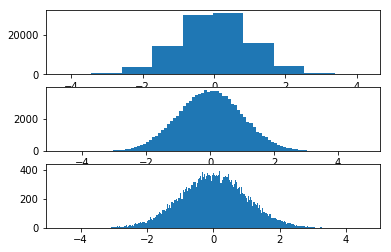

In [9]:
plt.subplot(311)
plt.hist(np.random.randn(100000), bins=10)
plt.subplot(312)
plt.hist(np.random.randn(100000), bins=100)
plt.subplot(313)
_=plt.hist(np.random.randn(100000), bins=1000)

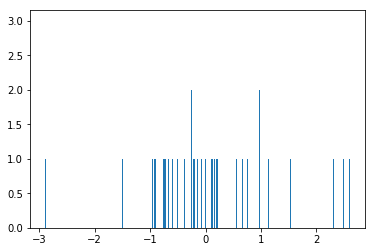

In [10]:
_=plt.hist(np.random.randn(100), bins=1000)